In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merge_table = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
merge_table.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

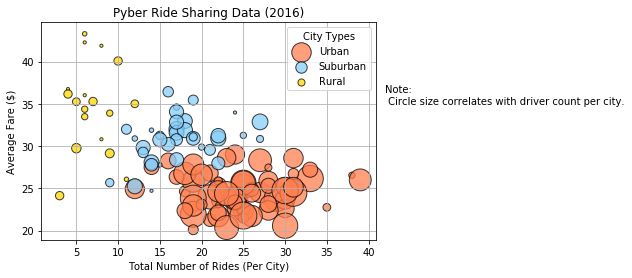

In [10]:
# Obtain the x and y coordinates for each of the three city types
type_group = merge_table.groupby(["city", "type", "driver_count", "ride_id", "fare"]).count()

urban = type_group.reset_index()
urban = urban.loc[urban["type"] == "Urban"]
urban_x = urban.groupby("city").count()["ride_id"]
urban_y = urban.groupby("city").mean()["fare"]
urban_s = urban.groupby("city").mean()["driver_count"]

sub = type_group.reset_index()
sub = sub.loc[sub["type"] == "Suburban"]
sub_x = sub.groupby("city").count()["ride_id"]
sub_y = sub.groupby("city").mean()["fare"]
sub_s = sub.groupby("city").mean()["driver_count"]

rural = type_group.reset_index()
rural = rural.loc[rural["type"] == "Rural"]
rural_x = rural.groupby("city").count()["ride_id"]
rural_y = rural.groupby("city").mean()["fare"]
rural_s = rural.groupby("city").mean()["driver_count"]

# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_x, urban_y, marker="o", facecolors="coral", edgecolors="black",
             s=urban_s*10, alpha=0.75, label="Urban")
sub_plot = plt.scatter(sub_x, sub_y, marker="o", facecolors="lightskyblue", edgecolors="black",
             s=sub_s*10, alpha=0.75, label="Suburban")
rural_plot = plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black",
             s=rural_s*10, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(axis="both")

# Create a legend
plt.legend(handles=[urban_plot, sub_plot, rural_plot], title="City Types", loc="best", fancybox=True)

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: \n Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/pyberridesharingdata2016.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

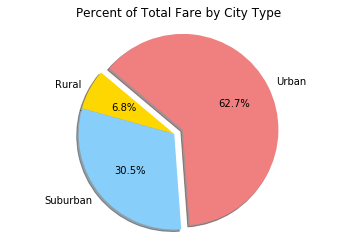

In [4]:
# Calculate Type Percents
total_fare = merge_table["fare"].sum()
group_type = merge_table.groupby("type")["fare"].sum()
percents = group_type/total_fare*100

# Build Pie Chart 

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]

plt.pie(percents, explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percent of Total Fare by City Type")
plt.axis("equal")

# Save Figure

plt.savefig("Images/farebycitytype.png")


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

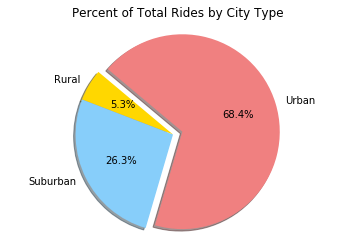

In [6]:
# Calculate Ride Percents
total_rides = merge_table["ride_id"].count()

rides_city = merge_table.groupby("type")["ride_id"].count()
ride_percent = rides_city/total_rides*100

# Build Pie Chart
plt.pie(ride_percent, explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percent of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/ridesbycitytype.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

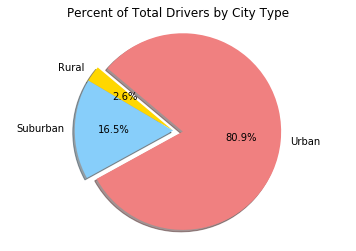

In [8]:
# Calculate Driver Percents
type_group = merge_table.groupby(["city", "type", "driver_count"]).count()

urban = type_group.reset_index()
urban = urban.loc[urban["type"] == "Urban"]
urban_drivers = urban["driver_count"].sum()

rural = type_group.reset_index()
rural = rural.loc[rural["type"] == "Rural"]
rural_drivers = rural["driver_count"].sum()

sub = type_group.reset_index()
sub = sub.loc[sub["type"] == "Suburban"]
sub_drivers = sub["driver_count"].sum()

total_drivers = sub_drivers + rural_drivers + urban_drivers

urbanp = urban_drivers/total_drivers
ruralp = rural_drivers/total_drivers
subp = sub_drivers/total_drivers
percents = [ruralp, subp, urbanp]

# Build Pie Charts
plt.pie(percents, explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percent of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/driversbycitytype.png")

In [9]:
# Show Figure
plt.show()

In [ ]:
# Observations:
# 1) Urban areas have the highest concentration of drivers and generate the most total money in fares.
# 2) Customer fares are generally highest in rural areas where there are less drivers and less total rides.
# 3) Suburban rides make up only 26% of the total rides, but account for 30% of the fare revenue. 